In [13]:
import numpy as np
import pandas as pd
from math import pi
import matplotlib.pyplot as plt

def respOut(argument):
  response = {
    "rarely": 1, 
    "sometimes": 2, 
    "almost always": 3
  }
  return response.get(argument, lambda: "Invalid Response Name")

def langOut(argument):
  language = {
    "Engagement": 1, 
    "Consideration": 2, 
    "Candor": 3,
    "Order": 4, 
    "Recognition": 5,
    "Time Commitment": 6,
    "Transparency": 7
  }
  return language.get(argument, lambda: "Invalid Language Name")

def langIn(argument):
  language = {
    1: "Engagement",
    2: "Consideration",
    3: "Candor",
    4: "Order",
    5: "Recognition",
    6: "Time Commitment",
    7: "Transparency"
  }
  return language.get(argument, lambda: "Invalid Language ID")

def levOut(argument):
  level = {
    "Senior": 10,
    "Peer": 20,
    "Junior": 30
  }
  return level.get(argument, lambda: "Invalid Level Name")

def levIn(argument):
  level = {
    1: "Senior",
    2: "Peer",
    3: "Junior"
  }
  return level.get(argument, lambda: "Invalid Level ID")

def dirOut(argument):
  direction = {
    "Give": 100,
    "Get": 200
  }
  return direction.get(argument, lambda: "Invalid Direction")
  
def dirIn(argument):
  response = {
    1: "Give",
    2: "Get"
  }
  return response.get(argument, lambda: "Invalid Direction ID")

In [14]:
key = pd.read_csv("working.csv")
df = pd.read_csv("Workplace Communication Assessment_3.2.2021.xlsx - RawData.csv")

question_num = len(key)
users = len(df)

output = [0] * question_num
for q in range(question_num):
    output[q] = levOut(key.Level[q]) + dirOut(key.Direction[q]) + langOut(key.Language[q])

In [15]:
group = dict()

for i in range(len(output)):
    if output[i] in group:
        group[output[i]].append(i)
    else:
        group[output[i]] = [i]

allVal = []
for u in range(users):
    userVal = dict()
    for key in group:
        localTotal = 0
        for i in range(len(group[key])):
            localTotal += respOut(df.iloc[:, group[key][i] + 6][u])
        userVal[key] = localTotal
    allVal.append(userVal)

In [16]:
def toTable(index):
    give = pd.DataFrame()
    get = pd.DataFrame()
    languages = []
    for i in range(7):
        languages.append(langIn(i + 1))
    give["Give"] = languages
    get["Get"] = languages
    giveValues = []
    getValues = []
    
    
    for lev in range(3):
        totals = []
        for lang in range(7):
            totals.append(allVal[index][100 + (lev + 1) * 10 + (lang + 1)])
        giveValues.append(totals)
    give["Seniors"] = giveValues[0]
    give["Peers"] = giveValues[1]
    give["Juniors"] = giveValues[2]
    give["Total"] = [sum(col) for col in zip(*giveValues)]
    
    for lev in range(3):
        totals = []
        for lang in range(7):
            totals.append(allVal[index][200 + (lev + 1) * 10 + (lang + 1)])
        getValues.append(totals)
    get["Seniors"] = getValues[0]
    get["Peers"] = getValues[1]
    get["Juniors"] = getValues[2]
    get["Total"] = [sum(col) for col in zip(*getValues)]
    
    return give, get

In [34]:
def toRadar(df):
    categories=df.iloc[:,0]
    types = ["Senior", "Peer", "Junior"]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(1)
    plt.yticks([2,4,6,8], [2,4,6,8], color="grey", size=7)
    plt.ylim(0,10)

    colors = ['b', 'or', 'g']

    for i in range(3):
        values=df.T.iloc[i+1].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=types[i])
        ax.fill(angles, values, colors[i], alpha=.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    return plt

In [42]:
index = 7
print(df["First and Last Name"][index])
display(toTable(index)[0])
display(toTable(index)[1])

Carmen Berrysmith


,Give,Seniors,Peers,Juniors,Total
0,Engagement,8,8,5,21
1,Consideration,6,6,7,19
2,Candor,8,9,9,26
3,Order,6,8,7,21
4,Recognition,6,7,9,22
5,Time Commitment,8,8,8,24
6,Transparency,8,7,5,20


,Get,Seniors,Peers,Juniors,Total
0,Engagement,4,6,7,17
1,Consideration,4,5,6,15
2,Candor,9,9,9,27
3,Order,6,6,6,18
4,Recognition,6,8,7,21
5,Time Commitment,7,8,8,23
6,Transparency,6,9,9,24


Julie Pham


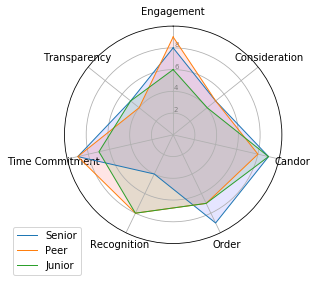

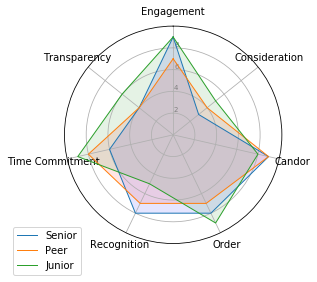

Julie 2


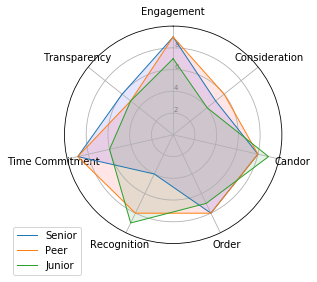

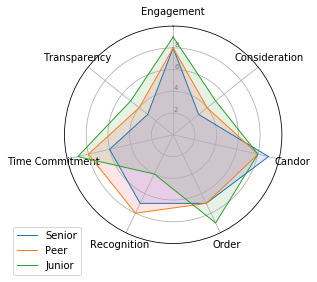

Julia Shull


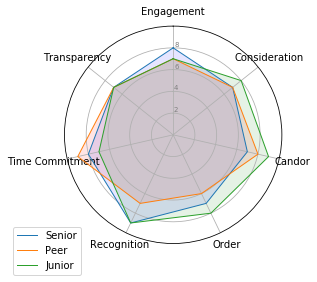

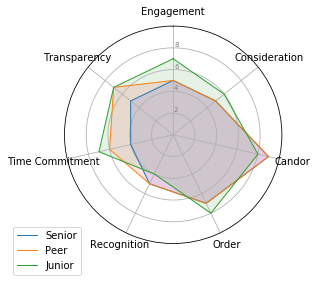

Alexander Cohen


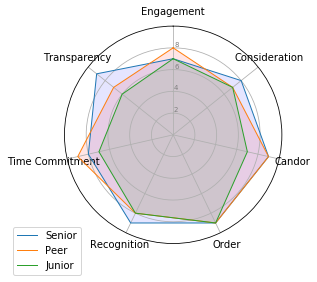

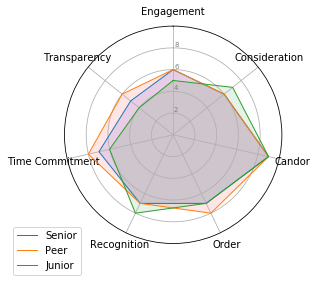

Joyce Elauria


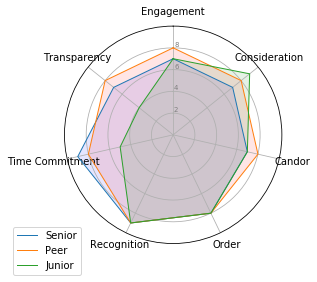

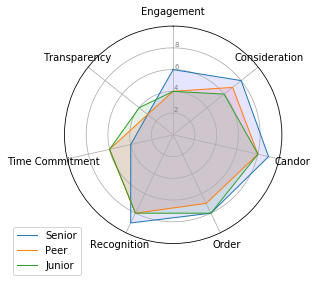

Allison  Bennett


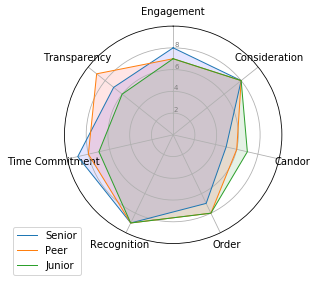

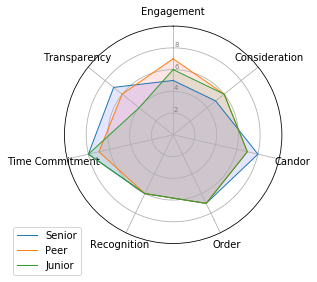

Linh Huynh 


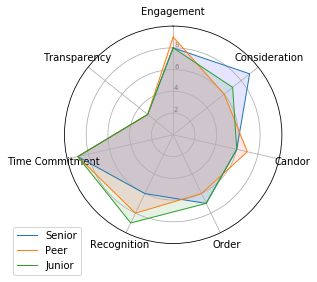

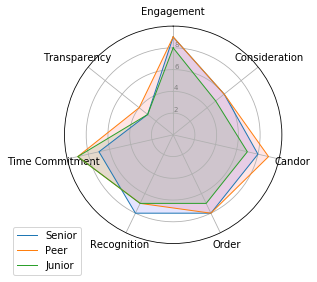

In [41]:
for i in range(7):
    print(df["First and Last Name"][i])
    toRadar(toTable(i)[0]).show()
    toRadar(toTable(i)[1]).show()